# Ujian Akhir Semester Data Mining
Anggota kelompok:
1. Evelyn Eunike Aritonang (G1A022024)
2. Sinta Ezra Wati Gulo (G1A022040)

## Business Understanding
**a. Problem Statement**
<br>Universitas mengalami tingkat mahasiswa putus studi (drop out/DO) yang cukup tinggi, yang berdampak negatif terhadap pencapaian akademik, efisiensi pendanaan pendidikan, serta reputasi lembaga. Selama ini, intervensi terhadap mahasiswa bermasalah sering kali terlambat karena tidak ada sistem yang mampu mengidentifikasi risiko DO secara dini dan berbasis data.

**b. Tujuan (Goals)**
- Mengembangkan sistem prediksi risiko DO yang berbasis data mining.
- Mendeteksi mahasiswa yang berpotensi mengalami DO sejak dini, sehingga pihak akademik dapat melakukan intervensi yang tepat dan efektif.

**c. Solution Statements**
Untuk mencapai tujuan tersebut, sistem akan:
- Menggunakan algoritma klasifikasi yaitu Random Forest untuk memodelkan pola risiko DO berdasarkan data historis mahasiswa.
- Memanfaatkan fitur-fitur seperti IPK per semester, kehadiran kuliah, riwayat pengambilan ulang mata kuliah, aktivitas di e-learning, status pekerjaan, dan data sosial ekonomi.
- Menghasilkan output berupa prediksi (DO atau tidak).
- Diintegrasikan ke dalam sistem akademik universitas dan disajikan melalui dashboard untuk pihak rektorat dan dosen wali.

## Import Library

In [54]:
# Library utama
import pandas as pd
import numpy as np

# Visualisasi & statistik
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

## Data Understanding

In [55]:
df = pd.read_csv('data/data_mahasiswa_1000.csv')
df.head()

,semester_aktif,kehadiran_total,retake_count,elearning_login_count,elearning_partisipasi,elearning_tugas_dikumpul,status_kerja,beban_kerja,pendapatan_ortu,ipk_sem1,ipk_sem2,ipk_sem3,ipk_sem4,ipk_sem5,ipk_sem6,ipk_sem7,ipk_sem8,status_beasiswa,dropout
0,8,100,0,31,17,0,Tidak Bekerja,0.000000,1890906,3.07,3.07,2.95,3.16,2.43,3.46,2.53,2.64,1,0
1,8,52,3,33,3,8,Tidak Bekerja,0.000000,3474958,3.08,2.58,3.22,2.96,3.54,2.54,3.16,3.10,1,1
2,3,60,1,9,27,5,Bekerja,13.671713,2844410,3.35,2.61,2.53,NaN,NaN,NaN,NaN,NaN,0,1
3,3,98,0,22,11,2,Bekerja,16.713181,4539248,2.67,3.31,3.26,NaN,NaN,NaN,NaN,NaN,0,0
4,8,57,1,7,22,6,Tidak Bekerja,0.000000,2075682,2.39,2.84,2.85,2.47,2.95,2.82,3.15,2.76,1,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   semester_aktif            1000 non-null   int64  
 1   kehadiran_total           1000 non-null   int64  
 2   retake_count              1000 non-null   int64  
 3   elearning_login_count     1000 non-null   int64  
 4   elearning_partisipasi     1000 non-null   int64  
 5   elearning_tugas_dikumpul  1000 non-null   int64  
 6   status_kerja              1000 non-null   object 
 7   beban_kerja               1000 non-null   float64
 8   pendapatan_ortu           1000 non-null   int64  
 9   ipk_sem1                  1000 non-null   float64
 10  ipk_sem2                  1000 non-null   float64
 11  ipk_sem3                  856 non-null    float64
 12  ipk_sem4                  721 non-null    float64
 13  ipk_sem5                  581 non-null    float64
 14  ipk_sem6 

**Insight:**
<br>Berdasarkan informasi di atas, berikut adalah variabel-variabel yang ada pada dataset:
- semester_aktif: Jumlah semester yang sudah ditempuh oleh mahasiswa hingga saat ini.
- kehadiran_total: Jumlah total kehadiran mahasiswa dalam perkuliahan.
- retake_count: Jumlah mata kuliah yang diulang oleh mahasiswa.
- elearning_login_count: Total jumlah login ke sistem e-learning oleh mahasiswa.
- elearning_partisipasi: Jumlah aktivitas partisipasi (forum, kuis, dll.) mahasiswa di e-learning.
- elearning_tugas_dikumpul: Jumlah tugas yang dikumpulkan melalui platform e-learning.
- status_kerja: Status pekerjaan mahasiswa, seperti "bekerja", "tidak bekerja", atau kategori lainnya (tipe data object, perlu encoding jika digunakan dalam model).
- beban_kerja: Beban kerja dalam jam per minggu jika mahasiswa bekerja (bernilai 0 jika tidak bekerja).
- pendapatan_ortu: Pendapatan orang tua mahasiswa (dalam satuan tertentu, misal ribuan atau jutaan rupiah).
- ipk_sem1: IPK mahasiswa pada semester 1.
- ipk_sem2: IPK mahasiswa pada semester 2.
- ipk_sem3: IPK mahasiswa pada semester 3 (beberapa data bisa hilang karena belum mencapai semester ini).
- ipk_sem4: IPK mahasiswa pada semester 4.
- ipk_sem5: IPK mahasiswa pada semester 5.
- ipk_sem6: IPK mahasiswa pada semester 6.
- ipk_sem7: IPK mahasiswa pada semester 7.
- ipk_sem8: IPK mahasiswa pada semester 8.
- status_beasiswa: Status beasiswa, 1 jika mahasiswa menerima beasiswa dan 0 jika tidak.
- dropout: Status kelulusan mahasiswa, di mana 1 berarti dropout (berhenti studi), dan 0 berarti tidak dropout (masih aktif atau lulus).

In [57]:
df.describe()

,semester_aktif,kehadiran_total,retake_count,elearning_login_count,elearning_partisipasi,elearning_tugas_dikumpul,beban_kerja,pendapatan_ortu,ipk_sem1,ipk_sem2,ipk_sem3,ipk_sem4,ipk_sem5,ipk_sem6,ipk_sem7,ipk_sem8,status_beasiswa,dropout
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,856.000000,721.000000,581.000000,430.000000,274.000000,134.000000,1000.000000,1000.00000
mean,4.996000,75.209000,0.94500,23.956000,14.967000,4.432000,5.767878,2.518015e+06,2.78530,2.789220,2.766192,2.806436,2.811480,2.776930,2.782445,2.869328,0.399000,0.54500
std,1.975319,14.819208,1.01637,14.269397,8.483152,2.902033,9.491782,1.021839e+06,0.38725,0.404203,0.399652,0.416103,0.390812,0.413857,0.401799,0.391056,0.489938,0.49822
min,2.000000,50.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,1.49000,1.180000,1.390000,1.750000,1.570000,1.550000,1.690000,1.930000,0.000000,0.00000
25%,3.000000,62.000000,0.00000,11.000000,8.000000,2.000000,0.000000,1.767071e+06,2.54000,2.510000,2.510000,2.520000,2.550000,2.500000,2.520000,2.612500,0.000000,0.00000
50%,5.000000,76.000000,1.00000,25.000000,15.000000,4.000000,0.000000,2.484858e+06,2.80000,2.780000,2.765000,2.810000,2.820000,2.790000,2.765000,2.850000,0.000000,1.00000
75%,7.000000,88.000000,1.00000,35.000000,22.000000,7.000000,14.507627,3.245117e+06,3.05000,3.080000,3.050000,3.100000,3.080000,3.050000,3.085000,3.157500,1.000000,1.00000
max,8.000000,100.000000,5.00000,49.000000,29.000000,9.000000,36.717925,5.584385e+06,4.00000,4.000000,3.940000,4.000000,3.950000,3.960000,3.950000,3.880000,1.000000,1.00000


**Insight:**
- Mayoritas mahasiswa ada di semester pertengahan (sekitar semester 5), artinya dataset mencakup mahasiswa dari berbagai tingkat.
- IPK mahasiswa relatif stabil dan sedang (sekitar 2.78 dari skala maksimal 4.0). Nilai minimum IPK cukup rendah (sekitar 1.18), menunjukkan ada mahasiswa dengan performa akademik sangat lemah. Distribusi IPK cukup konsisten, artinya tidak ada lonjakan/turunan besar antar semester.
- Rata-rata mahasiswa mengulang kurang dari 1 mata kuliah, namun ada yang mengulang hingga 5 kali, yang bisa menjadi indikator risiko dropout.

In [58]:
df.isnull().sum()

,0
semester_aktif,0
kehadiran_total,0
retake_count,0
elearning_login_count,0
elearning_partisipasi,0
elearning_tugas_dikumpul,0
status_kerja,0
beban_kerja,0
pendapatan_ortu,0
ipk_sem1,0


**Insight:**
- Mayoritas kolom tidak memiliki missing value (nilai = 0)
- Missing value hanya terjadi pada kolom IPK semester 3–8, dengan jumlah yang semakin banyak di semester atas, yang menunjukkan tidak semua mahasiswa sudah menempuh semester tersebut.

In [59]:
print('Jumlah data duplikat: ', df.duplicated().sum())

Jumlah data duplikat:  0


**Insight:**
<br>Tidak ada data duplikat pada dataset ini.

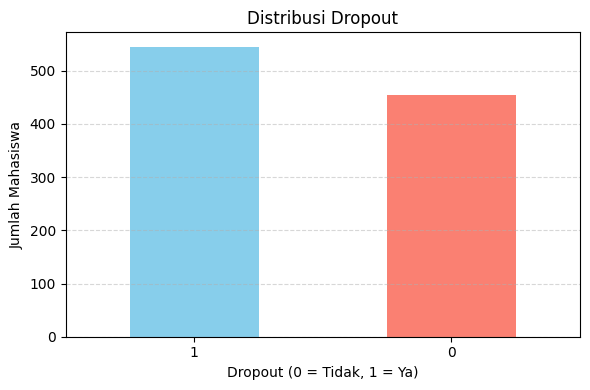

In [60]:
# Plot distribusi dropout
plt.figure(figsize=(6, 4))
df['dropout'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Dropout')
plt.xlabel('Dropout (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah mahasiswa dengan label 1 (Dropout) lebih tinggi dibanding yang 0 (Tidak Dropout).
- Ini menunjukkan bahwa tingkat dropout di dataset cukup tinggi, sekitar 55% dari total populasi mahasiswa.

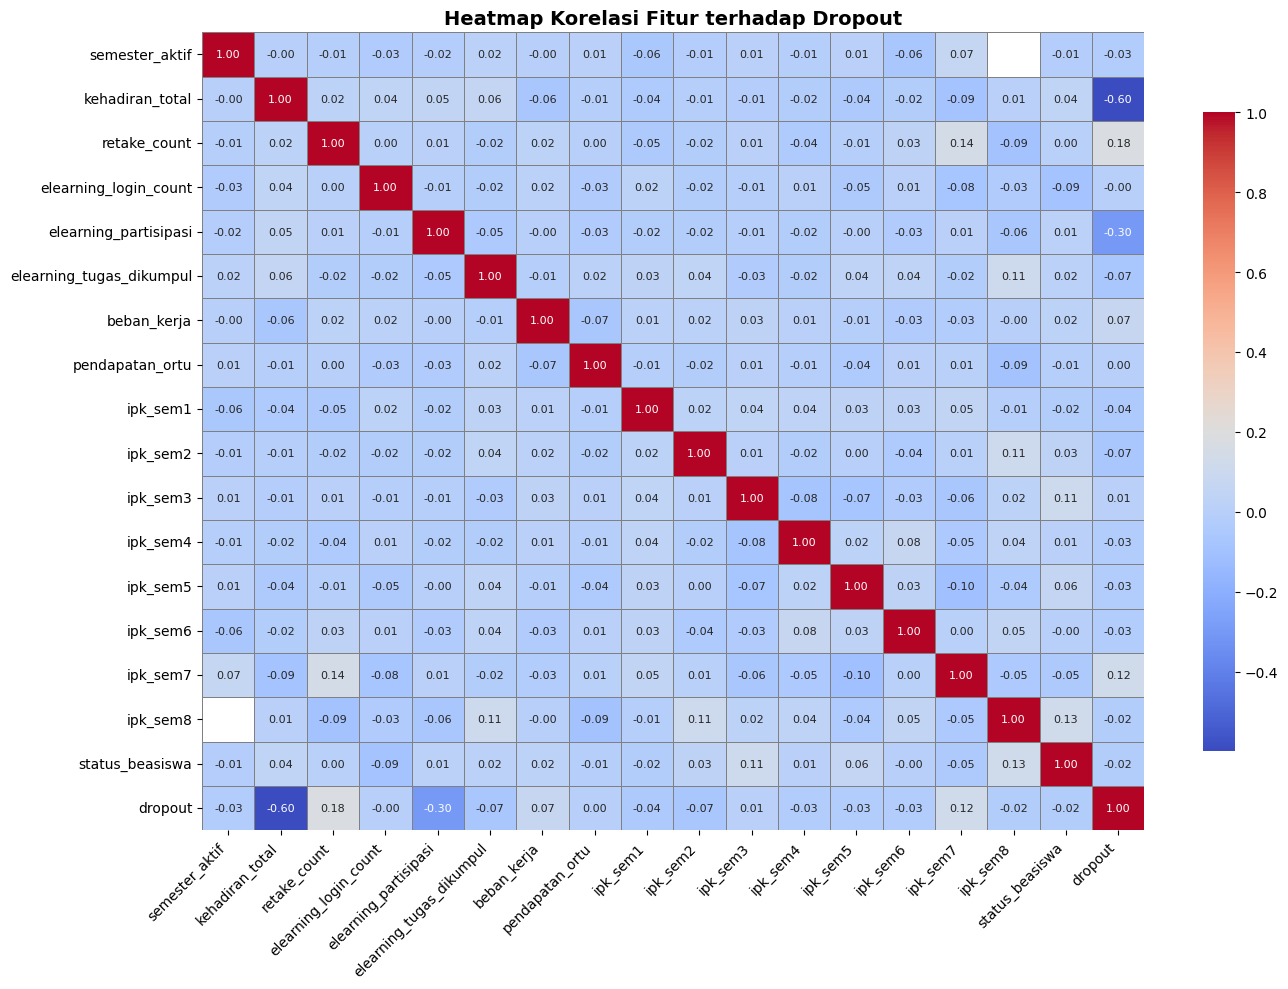

In [61]:
# Heatmap korelasi
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title("Heatmap Korelasi Fitur terhadap Dropout", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- kehadiran_total memiliki korelasi negatif kuat dengan dropout
- elearning_partisipasi memiliki korelasi negatif sedang dengan dropout
- retake_count memiliki korelasi positif lemah dengan dropout
- ipk_sem1 s.d. ipk_sem8 memiliki korelasi negatif sangat lemah dengan dropout
- status_beasiswa memiliki korelasi negatif sangat lemah dengan dropout
- semester_aktif memiliki korelasi negatif sangat lemah dengan dropout
- elearning_tugas_dikumpul memiliki korelasi negatif sangat lemah dengan dropout
- elearning_login_count memiliki korelasi negatif sangat lemah dengan dropout
- beban_kerja memiliki korelasi positif sangat lemah dengan dropout
- pendapatan_ortu memiliki korelasi sangat lemah atau hampir tidak berpengaruh terhadap dropout

## Data Pre-processing

Pada tahap ini dilakukan data pre-pocessing untuk mempersiapkan data agar siap digunakan dalam modeling. Berikut data pre-pocessing yang dilakukan:
1. Menangani missing value
2. Encoding data kategorik
3. Pemisahan fitur dan target
4. Standarisasi

**Menangani Missing Value**

In [62]:
# Imputasi IPK yang kosong dengan rata-rata kolom
ipk_columns = [col for col in df.columns if 'ipk_sem' in col]
imputer = SimpleImputer(strategy='mean')
df[ipk_columns] = imputer.fit_transform(df[ipk_columns])

**Insight:**
<br>Data IPK per semester memiliki banyak nilai kosong. Imputasi dengan rata-rata kolom dilakukan agar:
  - Model tetap bisa belajar tanpa error.
  - Menghindari bias dengan cara sederhana dan umum.
  - Tidak membuang banyak data (jika di-drop, data bisa jauh berkurang).

**Encoding Data Kategorik**

In [63]:
label_cols = ['status_kerja', 'status_beasiswa']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

**Insight:**
<br>Model machine learning hanya bisa memproses data numerik, sehingga data kategorikal seperti status_kerja dan status_beasiswa harus diubah menjadi angka agar mudah digunakan dalam pemodelan nanti.

**Pemisahan Fitur dan Target**

In [64]:
# Pisahkan fitur dan target (dropout)
X = df.drop('dropout', axis=1)
y = df['dropout']

**Insight:**
- X adalah data input (fitur) yang digunakan untuk memprediksi dropout.
- y adalah label/output yang ingin diprediksi (dropout).
- Pemisahan ini penting agar model tahu apa yang harus dipelajari.

**Standarisasi**

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Ubah X_scaled (array) menjadi DataFrame agar lebih mudah dibaca
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Tampilkan beberapa baris pertama
X_scaled_df.head()

,semester_aktif,kehadiran_total,retake_count,elearning_login_count,elearning_partisipasi,elearning_tugas_dikumpul,status_kerja,beban_kerja,pendapatan_ortu,ipk_sem1,ipk_sem2,ipk_sem3,ipk_sem4,ipk_sem5,ipk_sem6,ipk_sem7,ipk_sem8,status_beasiswa
0,1.521528,1.673733,-0.930245,0.493891,0.239771,-1.527969,0.635999,-0.607975,-0.614013,0.735552,0.694999,0.497394,1.001387,-1.281710,2.519919e+00,-1.202477,-1.608024e+00,1.227300
1,1.521528,-1.566927,2.022913,0.634121,-1.411384,1.230098,0.635999,-0.607975,0.936960,0.761388,-0.517871,1.228026,0.434935,2.447705,-8.740615e-01,1.798413,1.617443e+00,1.227300
2,-1.010975,-1.026817,0.054141,-1.048642,1.419168,0.195823,-1.572330,0.833120,0.319579,1.458960,-0.443613,-0.639145,0.000000,0.000000,-1.638294e-15,0.000000,3.113902e-15,-0.814797
3,-1.010975,1.538706,-0.930245,-0.137145,-0.467867,-0.838452,-1.572330,1.153712,1.979025,-0.297889,1.289058,1.336268,0.000000,0.000000,-1.638294e-15,0.000000,3.113902e-15,-0.814797
4,1.521528,-1.229358,0.054141,-1.188872,0.829470,0.540581,0.635999,-0.607975,-0.433096,-1.021298,0.125693,0.226789,-0.952873,0.465403,1.588891e-01,1.750780,-7.665979e-01,1.227300


**Insight:**
- Standarisasi mengubah data ke skala dengan mean 0 dan standar deviasi 1, membuat semua fitur setara.
- Standarisasi meningkatkan performa dan konvergensi model.

## Modelling

In [67]:
# Split dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

## Evaluasi

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        85
           1       1.00      0.97      0.98       115

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



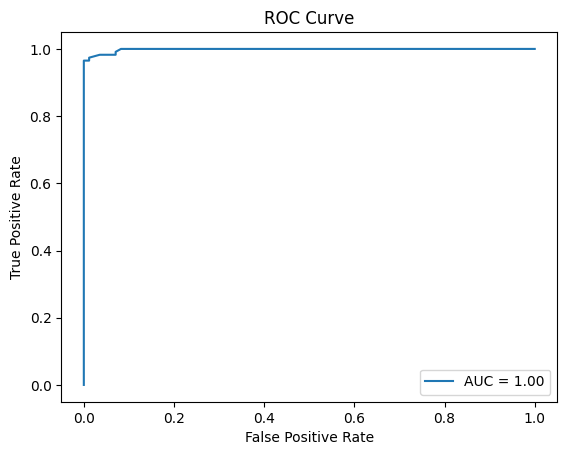

In [68]:
print(classification_report(y_test, y_pred))

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

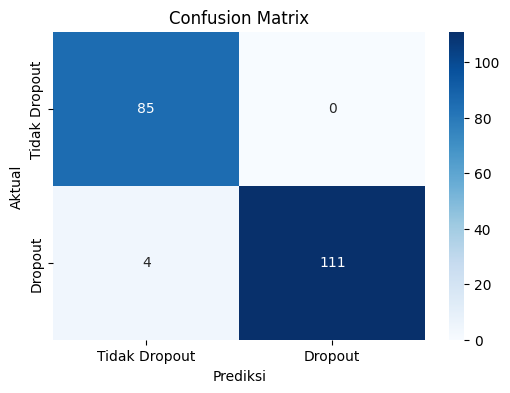

In [69]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Dropout', 'Dropout'],
            yticklabels=['Tidak Dropout', 'Dropout'])

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 1.00
Testing Accuracy:  0.98
Training F1-score: 1.00
Testing F1-score:  0.98


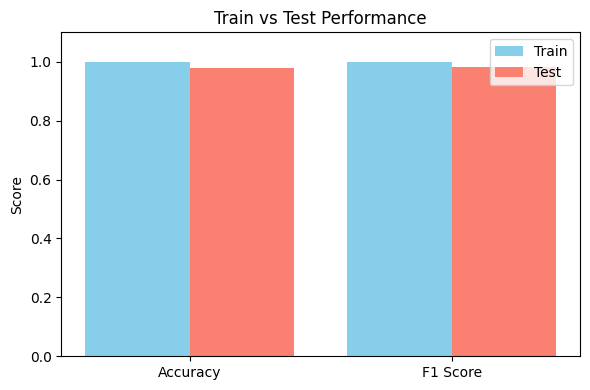

In [70]:
# Prediksi training dan testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Hitung akurasi dan f1-score
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Cetak nilai
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")
print(f"Training F1-score: {train_f1:.2f}")
print(f"Testing F1-score:  {test_f1:.2f}")

# Visualisasi bar chart
labels = ['Accuracy', 'F1 Score']
train_scores = [train_acc, train_f1]
test_scores = [test_acc, test_f1]

x = range(len(labels))
plt.figure(figsize=(6, 4))
plt.bar(x, train_scores, width=0.4, label='Train', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test', align='center', color='salmon')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Train vs Test Performance')
plt.legend()
plt.tight_layout()
plt.show()

**Analisis Hasil Evaluasi:**
- Model Random Forest bekerja sangat baik.
- Precision tinggi (≥ 0.96) menunjukkan model jarang salah dalam prediksi dropout maupun tidak dropout.
- Recall juga tinggi pada kedua kelas berarti model mampu menangkap hampir semua kasus sebenarnya.
- F1-score seimbang (0.98) menunjukkan trade-off yang sangat baik antara precision dan recall.
- Dari hasil confusion matrix, hanya 4 mahasiswa dropout yang salah diprediksi tidak dropout. Tidak ada FP (False Positive = 0) semua yang diprediksi akan dropout memang benar-benar dropout, artinya ini sangat bagus untuk intervensi dini.
- AUC = 1.00 menunjukkan kemampuan klasifikasi sempurna. Kurva ROC sangat dekat ke pojok kiri atas, menandakan hampir tidak ada trade-off antara TPR dan FPR.
- Model tidak overfitting, meski training perfect. Selisih sangat kecil (0.02), artinya model generalisasi dengan baik di data yang belum pernah dilihat.

In [71]:
import pickle

# Simpan model ke file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

## **Rencana Pengembangan Sistem**

Rencana pengembangan sistem kami divisualisasikan secara interaktif melalui dashboard berbasis Streamlit. Dashboard ini menyajikan berbagai informasi penting terkait data mahasiswa.  Tersedia juga fitur inferensi yang memungkinkan pengguna memasukkan data individu untuk memperoleh prediksi apakah mahasiswa tersebut berisiko mengalami dropout. Visualisasi ini bertujuan memberikan gambaran yang komprehensif dan mendukung pengambilan keputusan berbasis data secara lebih efektif.

**LINK STREAMLIT:** https://prediksi-mahasiswa-do-sinzeve.streamlit.app/